In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima_model import ARIMA

In [2]:
# configure df options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:,.5f}'.format

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../../dataset/final/training.csv', parse_dates=['date'])

In [4]:
# set index to time-series based 'date'
df.set_index('date',inplace=True)

In [5]:
df.index

DatetimeIndex(['2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-01', '2002-01-02', '2002-01-02', '2002-01-02',
               '2002-01-02', '2002-01-02',
               ...
               '2018-05-31', '2018-05-31', '2018-05-31', '2018-05-31',
               '2018-05-31', '2018-05-31', '2018-05-31', '2018-05-31',
               '2018-05-31', '2018-05-31'],
              dtype='datetime64[ns]', name='date', length=13500, freq=None)

In [6]:
# can not set index frequency to D - daily due to missing discontinuous timestamps in the dataset
# df.index.freq = 'D'
# df.index

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13500 entries, 2002-01-01 to 2018-05-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    13500 non-null  object 
 1   min     13500 non-null  float64
 2   max     13500 non-null  float64
 3   x       13500 non-null  float64
 4   y       13500 non-null  float64
 5   cm      13500 non-null  float64
dtypes: float64(5), object(1)
memory usage: 738.3+ KB


In [8]:
# sort by date index
df.sort_index(inplace=True)

df.head()

,code,min,max,x,y,cm
date,,,,,,
2002-01-01,ANTHUAN,3.50000,6.00000,106.57215,9.99752,0.00000
2002-01-01,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2002-01-01,SONDOC,0.10000,0.30000,106.52635,10.02522,30.48000
2002-01-01,BENTRAI,0.20000,1.00000,106.53715,9.87584,0.00000
2002-01-01,BINHDAI,0.50000,2.00000,106.69681,10.20635,152.40000


### ARIMA Self Help

In [9]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |

### Split training and test sets  
Use 2018 as test set for now. When 2019 data can be collected, 2019 samples will be used for testing and 2020 data can be considered as evaluation

In [16]:
test_year = 2018

In [17]:
train_df = df[df.index.year < test_year]
train_df.index

DatetimeIndex(['2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-01', '2002-01-02', '2002-01-02', '2002-01-02',
               '2002-01-02', '2002-01-02',
               ...
               '2017-05-30', '2017-05-30', '2017-05-30', '2017-05-30',
               '2017-05-30', '2017-05-31', '2017-05-31', '2017-05-31',
               '2017-05-31', '2017-05-31'],
              dtype='datetime64[ns]', name='date', length=11688, freq=None)

In [21]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
min,"11,688.00000",4.73880,4.11783,0.00000,1.50000,3.80000,7.00000,25.00000
max,"11,688.00000",11.41293,7.50862,0.00000,5.20000,10.70000,17.50000,58.40000
x,"11,688.00000",106.56198,0.09566,106.21894,106.52635,106.57215,106.59743,106.69681
y,"11,688.00000",10.07989,0.13631,9.87584,9.99752,10.02522,10.20635,10.29033
cm,"11,688.00000",121.65140,166.11815,0.00000,0.00000,30.48000,213.36000,944.88000


In [23]:
test_df = df[df.index.year >= test_year]
test_df.index

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01',
               ...
               '2018-05-31', '2018-05-31', '2018-05-31', '2018-05-31',
               '2018-05-31', '2018-05-31', '2018-05-31', '2018-05-31',
               '2018-05-31', '2018-05-31'],
              dtype='datetime64[ns]', name='date', length=1812, freq=None)

In [24]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
min,"1,812.00000",0.88008,1.67831,0.00000,0.00000,0.08000,0.90000,10.50000
max,"1,812.00000",1.34064,2.38594,0.00000,0.00000,0.10000,1.60000,12.10000
x,"1,812.00000",106.36199,0.10918,106.21894,106.27825,106.33757,106.41475,106.59743
y,"1,812.00000",10.13252,0.07891,10.02140,10.07289,10.12292,10.19215,10.24610
cm,"1,812.00000",393.70000,240.21386,0.00000,236.22000,381.00000,601.98000,731.52000


### Try out some simpler models on a specific station: SONDOC

In [133]:
value_field = 'max'
station_code = 'SONDOC'

# Jan to May
season_length = 150  # same length of 2018 test data - 1: 151 cause overflow encountered in double scalars

# seasonal adjustment
#adjustment = 'additive'
adjustment = 'multiplicative'

In [134]:
train_data = train_df.loc[train_df['code'] == station_code, value_field]

if adjustment == 'multiplicative':
    train_data = train_data[train_data > 0.02]
    
train_data.count()

2118

In [135]:
test_data = test_df.loc[test_df['code'] == station_code, value_field]

test_data.count()

151

1. Holt-Winters method via Exponential Smoothing

In [137]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(train_data, 
                                trend=adjustment, seasonal=adjustment, 
                                seasonal_periods=season_length).fit()

/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [138]:
hw_prediction = hw_model.forecast(season_length)

/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [139]:
hw_prediction.head(10)

2118   1.14051
2119   1.40019
2120   0.90833
2121   0.95497
2122   1.05056
2123   1.19157
2124   1.19960
2125   0.94555
2126   0.81101
2127   0.77234
dtype: float64

In [140]:
hw_prediction.tail(10)

2258   3.83466
2259   4.18934
2260   2.51471
2261   2.40676
2262   2.66570
2263   2.80253
2264   2.82530
2265   2.29582
2266   2.21582
2267   2.45439
dtype: float64

In [141]:
# since there are missing timestamps, reset index to integer
train_temp_df = train_data.reset_index()

train_temp_df.tail()

,date,max
2113,2016-06-23,3.40000
2114,2016-06-24,3.10000
2115,2016-06-27,1.20000
2116,2016-06-28,0.90000
2117,2016-06-29,1.00000


In [142]:
# since prediction does not have time series based index, reset index to match with prediction's index
test_temp_df = test_data.reset_index()
test_temp_df.index += 2118

test_temp_df.head()

,date,max
2118,2018-01-01,0.00000
2119,2018-01-02,0.00000
2120,2018-01-03,0.00000
2121,2018-01-04,0.00000
2122,2018-01-05,0.00000


In [143]:
test_temp_df.tail()

,date,max
2264,2018-05-27,0.50000
2265,2018-05-28,0.40000
2266,2018-05-29,0.40000
2267,2018-05-30,0.40000
2268,2018-05-31,0.30000


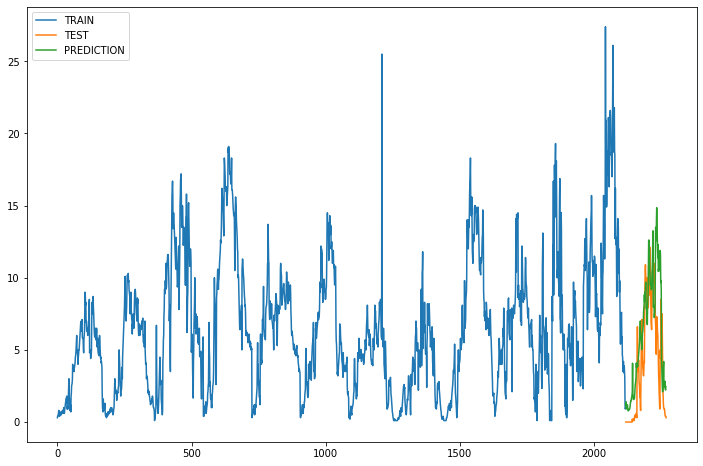

In [144]:
# plot prediction vs. true values
train_temp_df[value_field].plot(legend=True, label='TRAIN')
test_temp_df[value_field].plot(legend=True, label='TEST', figsize=(12,8))
hw_prediction.plot(legend=True, label='PREDICTION')

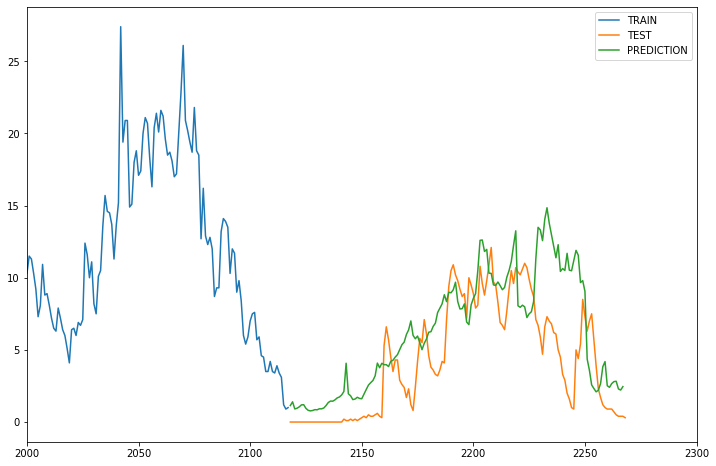

In [145]:
# plot prediction vs. true values (zoomed version)
train_temp_df[value_field].plot(legend=True, label='TRAIN')
test_temp_df[value_field].plot(legend=True, label='TEST', figsize=(12,8))
hw_prediction.plot(legend=True, label='PREDICTION', xlim=[2000, 2300])

#### Evaluating Prediction

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [152]:
# work-around the problem that test_data has 151 items while hw_prediction has 150
test_data = test_data.iloc[0:150]

test_data.describe()

count   150.00000
mean      4.31333
std       3.82246
min       0.00000
25%       0.40000
50%       4.00000
75%       7.30000
max      12.10000
Name: max, dtype: float64

In [153]:
hw_prediction.describe()

count   150.00000
mean      6.18199
std       3.99299
min       0.77234
25%       2.30274
50%       5.98216
75%       9.46358
max      14.85202
dtype: float64

The average of test data value is: 4.31  
The average of prediction value is: 6.18

In [156]:
mae = mean_absolute_error(test_data, hw_prediction)

mae

2.651184915194323

In [157]:
mse = mean_squared_error(test_data, hw_prediction)

mse

11.86542878058621

In [158]:
rmse = np.sqrt(mse)

rmse

3.44462316960596

#### Holt-Winters completely failed to predict  
rmse = 3.44 vs. test data STD = 3.82: Error in form of RMSE is almost 90% of STD => BAD

#### But let see how it can be used to forecasting future

In [161]:
# construct the full dataset of the station
full_data = df.loc[df['code'] == station_code, value_field]

if adjustment == 'multiplicative':
    full_data = full_data[full_data > 0.02]
    
full_data.count()

2245

In [162]:
# re-train model on the full dataset of the station
hw_final_model = ExponentialSmoothing(full_data, 
                                      trend=adjustment, 
                                      seasonal=adjustment, 
                                      seasonal_periods=season_length).fit()

/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/scipy/optimize/optimize.py:697: RuntimeWarning: overflow encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]
/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [166]:
# predict for 2019
hw_next_year_forecast = hw_final_model.forecast(season_length)

hw_next_year_forecast.head()

/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


2245   0.38432
2246   0.39847
2247   0.38198
2248   0.31243
2249   0.31904
dtype: float64

In [164]:
# since there are missing timestamps, reset index to integer
full_temp_df = full_data.reset_index()

full_temp_df.tail()

,date,max
2240,2018-05-27,0.50000
2241,2018-05-28,0.40000
2242,2018-05-29,0.40000
2243,2018-05-30,0.40000
2244,2018-05-31,0.30000


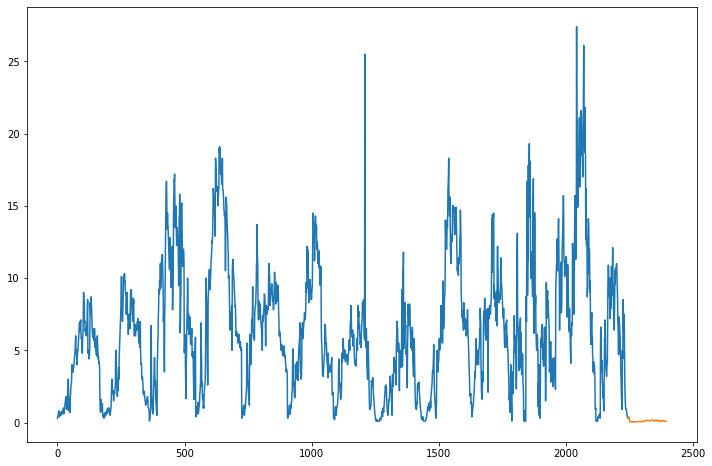

In [169]:
# plot
full_temp_df[value_field].plot(figsize=(12,8))
hw_next_year_forecast.plot()

#### Clearly failed to forecast  
Something wrong with the seasonal_periods = 150 (5 months) causing:  
1. RuntimeWarning: overflow encountered in double_scalars: df = (f(*((xk + d,) + args)) - f0) / d[k]
2. ConvergenceWarning: Optimization failed to converge. Check mle_retvals

### Mentor: Could you help me explain why these are happening?

2. Other simple model goes here

### ARIMA models on a specific station: SONDOC

1. Using AR component

In [170]:
from statsmodels.tsa.ar_model import AR, ARResults

In [171]:
train_data = train_df.loc[train_df['code'] == station_code, value_field]
test_data = test_df.loc[test_df['code'] == station_code, value_field]

In [174]:
model = AR(train_data)

ARfit = model.fit(method='mle', ic='t-stat')

lags = ARfit.k_ar

print(f'Lag: {lags}')
print(f'Coefficients:\n{ARfit.params}')

/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Lag: 25
Coefficients:
const      0.21625
L1.max     0.82348
L2.max     0.08352
L3.max    -0.03620
L4.max     0.03022
L5.max     0.04232
L6.max     0.00315
L7.max     0.02721
L8.max    -0.03415
L9.max     0.03898
L10.max   -0.02037
L11.max   -0.01971
L12.max    0.05511
L13.max   -0.00431
L14.max   -0.05736
L15.max    0.02058
L16.max    0.08980
L17.max   -0.07049
L18.max    0.02514
L19.max    0.00576
L20.max   -0.00950
L21.max   -0.06537
L22.max    0.04898
L23.max    0.00856
L24.max    0.01796
L25.max   -0.03807
dtype: float64


In [177]:
ARprediction = ARfit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1).rename(f'AR({lags}) Prediction')

/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


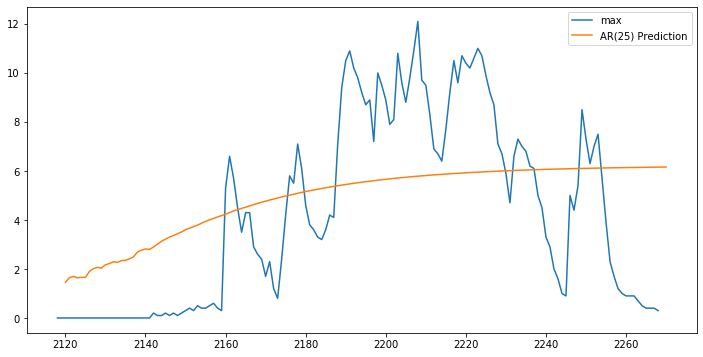

In [180]:
test_temp_df[value_field].plot(legend=True)
ARprediction.plot(legend=True,figsize=(12,6));